In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.signal import find_peaks

In [74]:
def df2ghrg(df,pdf,duration,starting_cycle=0):
    clis = []
    tlis=[]
    for cycle in pdf.index:
        prod=df['NOVA_CO'].loc[cycle-1:cycle+duration].mean()
        temp=df['TE-1133'].loc[cycle-1:cycle+duration].mean()
        tlis.append(temp)
        clis.append(prod)
    proddf=pd.DataFrame(clis,columns=['CO_Prod'])
    ghrg=(proddf/100)*(ghsv*bedvol/22.4*28.01/bedwt)
    ghrg['Temps']=pd.Series(tlis)
    ghrg.index.name="Cycle"
    ghrg.index=ghrg.index+starting_cycle
    return ghrg

def df2peaks(df,h,d):
    x=df['date/time']
    y=df['NOVA_CO']
    peaks,_=find_peaks(y,height=h,distance=d)
    peaksdf=x.iloc[peaks]
    peaksdf=peaksdf.to_frame()
    peaksdf['NOVA_CO']=y.iloc[peaks]
    return peaksdf

In [46]:
#Import CSV data
df=pd.read_csv('~/Desktop/02192020.csv')
df['date/time']=pd.to_datetime(df['date/time'],format='%y%m%d-%H%M%S')
df2=df[42460:]
df=df[:42459]

In [6]:
# #Correction for purge
# df['CO_corr']=(100*df['NOVA_CO']/(df['NOVA_CO']+df['NOVA_CO2']))
# df['CO2_corr']=(100*df['NOVA_CO2']/(df['NOVA_CO']+df['NOVA_CO2']))

In [36]:
df2.head()

,date/time,NOVA_CO,NOVA_CO2,PT-110,PT-116,TE-1133
42460,2020-02-21 10:58:20,21.3064,15.7288,-0.953005,2.883966,643.626833
42461,2020-02-21 10:58:25,33.2237,26.2446,-1.108034,2.835316,643.614917
42462,2020-02-21 10:58:30,41.6043,38.2680,-1.263063,2.819111,643.603000
42463,2020-02-21 10:58:35,42.2643,44.3939,-1.361626,2.802906,643.591083
42464,2020-02-21 10:58:40,41.4316,47.6434,-1.375491,2.786701,643.579167


In [53]:
x=df['date/time']
x2=df2['date/time']
# y=df['CO_corr']
# y2=df['CO2_corr']
y=df['NOVA_CO']
y2=df2['NOVA_CO']
t=df2['TE-1133']
p=df['PT-110']
p2=df['PT-116']

In [54]:
peaksdf1=df2peaks(df,20,500)
peaksdf1.head()

,date/time,NOVA_CO
10518,2020-02-19 14:36:30,46.7884
11273,2020-02-19 15:39:25,47.8423
11899,2020-02-19 16:31:35,55.3380
12620,2020-02-19 17:31:40,55.3424
13340,2020-02-19 18:31:40,53.4035


In [55]:
peaksdf2=df2peaks(df2,10,200)
peaksdf2.head()

,date/time,NOVA_CO
42463,2020-02-21 10:58:35,42.2643
42703,2020-02-21 11:18:35,40.8481
42943,2020-02-21 11:38:35,40.5312
43184,2020-02-21 11:58:40,39.7207
43424,2020-02-21 12:18:40,39.8188


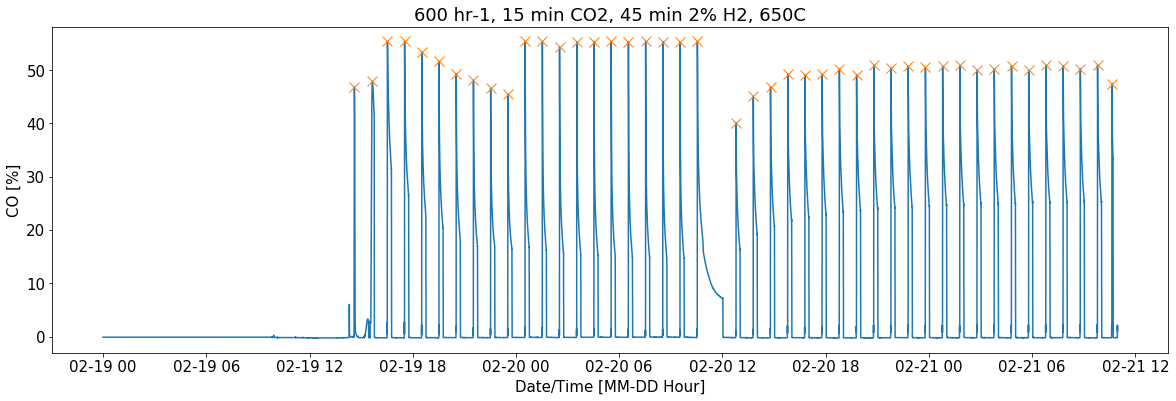

In [26]:
plt.figure(figsize=(20,6))
plt.rcParams.update({'font.size':15})
plt.plot(x,y)
plt.plot(peaksdf1['date/time'],peaksdf1['NOVA_CO'],'x',markersize=10)
plt.ylabel('CO [%]',fontsize=15)
plt.xlabel('Date/Time [MM-DD Hour]',fontsize=15)
plt.title("600 hr-1, 15 min CO2, 45 min 2% H2, 650C")
# plt.savefig('COvTime - 03022020.png')
plt.show()


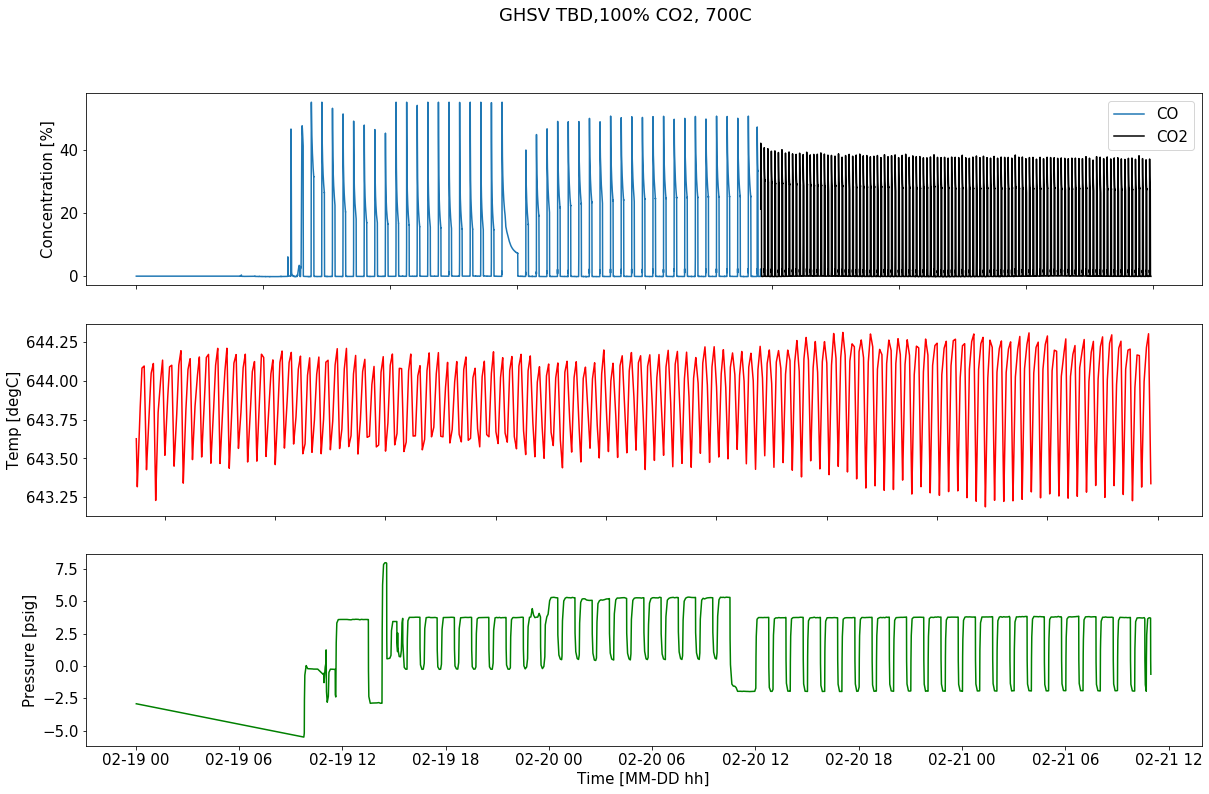

In [56]:
fig, axs = plt.subplots(3,figsize=(20,12))
plt.rcParams.update({'font.size':15})
fig.suptitle('GHSV TBD,100% CO2, 700C')
axs[0].plot(x,y,label="CO")
axs[0].plot(x2,y2,color="black",label="CO2")
axs[0].set_ylabel("Concentration [%]")
axs[0].legend()
axs[1].plot(x2,t,color='red')
axs[1].set_ylabel("Temp [degC]")
axs[2].plot(x,p,color='green')
axs[2].set_ylabel("Pressure [psig]")
axs[2].set_xlabel("Time [MM-DD hh]")
# xcoords=['2020-03-04 19:39:00','2020-03-05 07:20:00']
# for xc in xcoords:
#     for pl in range(3):
#         axs[pl].axvline(x=xc)
for ax in fig.get_axes():
    ax.label_outer()
# fig.savefig('cyclecomp - 02192020.png')

In [178]:
# x=x[175:185]
# y=y[175:185]
# y2=y2[175:185]
# t=t[175:185]
# p=p[175:185]
# fig, axs = plt.subplots(3,figsize=(20,12))
# plt.rcParams.update({'font.size':15})
# fig.suptitle('GHSV TBD,100% CO2, 700C')
# axs[0].plot(x,y,label="CO")
# # axs[0].plot(x,y2,color="black",label="CO2")
# axs[0].set_ylabel("Concentration [%]")
# axs[0].legend()
# axs[1].plot(x,t,color='red')
# axs[1].set_ylabel("Temp [degC]")
# axs[2].plot(x,p,color='green')
# axs[2].set_ylabel("Pressure [psig]")
# axs[2].set_xlabel("Time [DD hh:mm]")
# xcoords=['2020-03-04 19:39:00']
# for xc in xcoords:
#     for pl in range(3):
#         axs[pl].axvline(x=xc)
# for ax in fig.get_axes():
#     ax.label_outer()
# fig.savefig('Cyclebreakdownzoom - 03052020.png')

In [76]:
bedwt=120#grams
bedvol=0.21#liters
flow=2#SLM
ghsv=flow*60/bedvol#hr-1
h2_cycletime=45#minutes
co2_cycletime=15#minutes
ghrg1=df2ghrg(df,peaksdf1,300)
ghrg1.head()

,CO_Prod,Temps
Cycle,,
0,0.042705,647.585243
1,0.143371,645.158133
2,0.283742,643.782827
3,0.242882,643.482277
4,0.217014,643.258478


In [77]:
bedwt=120#grams
bedvol=0.21#liters
flow=2#SLM
ghsv=flow*60/bedvol#hr-1
h2_cycletime=15#minutes
co2_cycletime=5#minutes
ghrg2=df2ghrg(df2,peaksdf2,100,44)

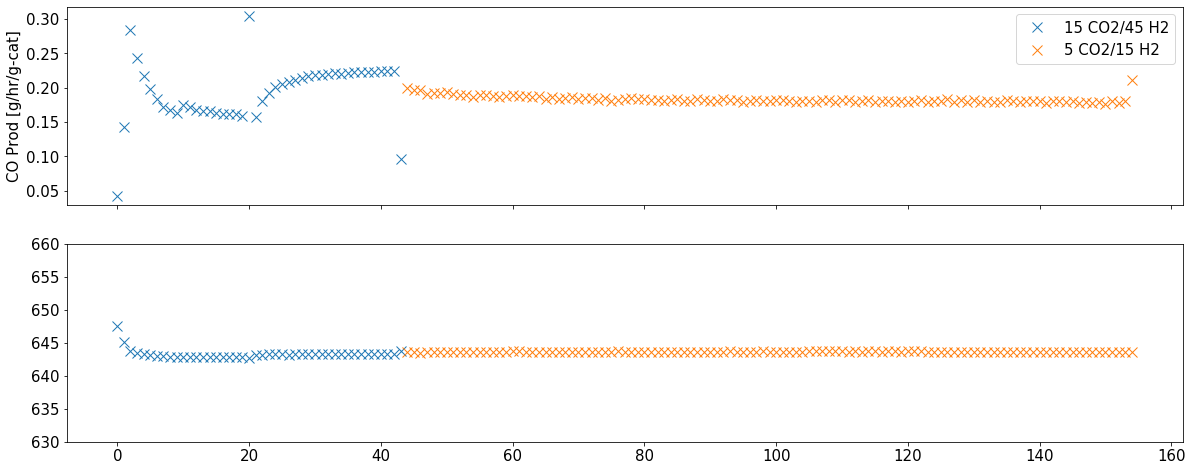

In [88]:
fig, axs = plt.subplots(2,figsize=(20,8))
plt.rcParams.update({'font.size':15})
axs[0].plot(ghrg1['CO_Prod'],"x",markersize=10,label="15 CO2/45 H2")
axs[0].plot(ghrg2['CO_Prod'],"x",markersize=10,label="5 CO2/15 H2")
axs[0].set_xlabel('Cycles',fontsize=15)
axs[0].set_ylabel("CO Prod [g/hr/g-cat]",fontsize=15)
axs[0].legend()
axs[1].plot(ghrg1['Temps'],"x",markersize=10)
axs[1].plot(ghrg2['Temps'],"x",markersize=10)
axs[1].set_ylim(630,660)
for ax in fig.get_axes():
    ax.label_outer()

In [179]:
#Permanently append ghrg to summary file, use carefully
# ghrg['CO_Prod'].to_csv('ghrgsum.csv',mode='a',header=False)